In [2]:
!pip install sklearn-genetic-opt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.0/136.0 kB 8.5 MB/s eta 0:00:00


gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.823566	0.107412   	0.929505   	0.584399   
1  	17    	0.906465	0.0629101  	0.936872   	0.71977    
2  	19    	0.927446	0.00659044 	0.936872   	0.920205   
3  	19    	0.930033	0.00619226 	0.936872   	0.920226   
4  	19    	0.936872	1.11022e-16	0.936872   	0.936872   
5  	20    	0.936872	1.11022e-16	0.936872   	0.936872   
6  	20    	0.937062	0.000571074	0.938775   	0.936872   
7  	20    	0.937633	0.00093256 	0.938775   	0.936872   
8  	18    	0.938394	0.000761432	0.938775   	0.936872   
9  	20    	0.938775	0          	0.938775   	0.938775   
10 	18    	0.938775	0          	0.938775   	0.938775   
11 	20    	0.938775	0          	0.938775   	0.938775   
12 	17    	0.938775	0          	0.938775   	0.938775   
13 	18    	0.938776	3.10366e-06	0.938785   	0.938775   
14 	18    	0.938776	3.10366e-06	0.938785   	0.938775   
15 	19    	0.938775	0          	0.938775   	0.938775   
16 	18    	0.938775	0          	0.938775   	0.93

/usr/local/lib/python3.12/dist-packages/sklearn_genetic/plots.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=range(len(estimator)), y=fitness_history, markers=True, palette=palette)


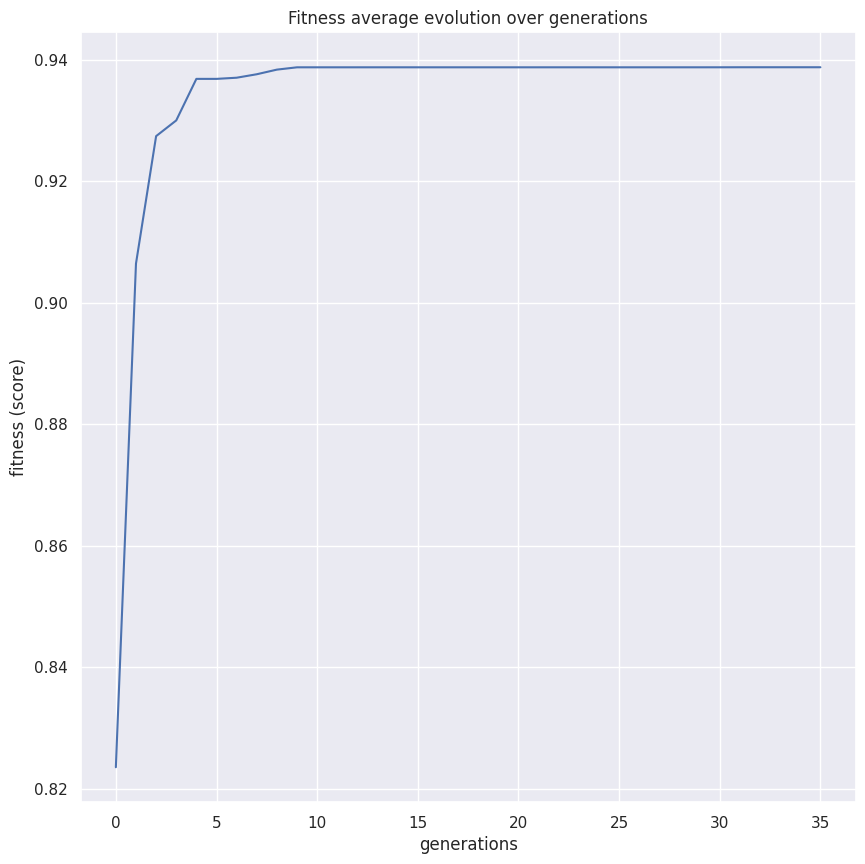

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

data = load_digits()

n_samples = len(data.images)
X = data.images.reshape((n_samples, -1))
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

clf = RandomForestClassifier()

param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
              'bootstrap': Categorical([True, False]),
              'max_depth': Integer(2, 30),
              'max_leaf_nodes': Integer(2, 35),
              'n_estimators': Integer(100, 300)}

cv = StratifiedKFold(n_splits=3, shuffle=True)

evolved_estimator = GASearchCV(estimator=clf,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=35,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=param_grid,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

evolved_estimator.fit(X_train,y_train)
y_predicy_ga = evolved_estimator.predict(X_test)
accuracy_score(y_test,y_predicy_ga)

plot_fitness_evolution(evolved_estimator)
plt.show()

En primera instancia se instala la librería faltante para desarrollar el código

Luego importamos las herramientas que utilizaremos, donde se saca toda la información necesaria para intentar dejar el código lo más simple posible.

Definimos los datos en conjunto con la línea "data = load_digits()" y luego las caracteristicas que tomará dicho conjunto.

se configura el modelo a utilizar donde utilizamos un "diccionario" para definir los ajustes

Finalmente con las líneas de "evolved_estimator" se busca los mejores ajustes por las bibliotecas cargadas. Ayuda a las predicciones y la precision de las mismas

Y la línea de plt.show nos muestra el gráfico de los datos recopilados